# BINF-F401 - Computational Methods for Functional Genomics

## Introduction

Pathology is a branch of medicine, whose focus is the study and diagnosis of diseases [1]. In order to establish a diagnostic, the analysis of tissue morphology is a central tool in the pathologist’s box. The examination of a tissue under the microscope is inescapable in the study and diagnosis of cancers, including for example thyroid cancer, despite the limitations associated with it. A central limitation of microscopy-based diagnostic and tissue morphology analysis is that tissue description is qualitative and, therefore, contains an inherent subjectivity : in the example of thyroid cancer, the diagnostic of a cancerous tissue is based on qualitative descriptions of the elements present on the microscope image (e.g. colored cell nuclei are « big » and « irregular » in cancer cells).

As mentioned, the qualitative nature of tissue morphology analysis is intrinsically limiting, hindering our ability to formalize our understanding of histology, as well as rendering the diagnostic of a disease potentially depending on the subjective human judgement of a pathologist. In order to ground tissue morphology study and tissue-based diagnostic of diseases on more quantitative grounds, artificial intelligence provides a promising path. Indeed, recent AI techniques provide a way to extract semantic information from an input image, composed of a matrix of pixels which could, in our case, represent a microscope image of a tissue of interest. An example of AI technique able to extract semantic information from input matrices of pixels is auto encoders, a self-supervised AI technique in which an artificial neural network is trained to reconstruct an input image, with a « bottleneck » layer of neurons that forces the network to compress the essential input information in order to « make it fit » in the « bottleneck » layer and be able to reconstruct the input image efficiently.

The compressed numerical representation of the input image can be considered as a latent representation of it, embedded in a space of reduced dimensions (defined by the size of the « bottleneck » neural layer) compared to the space in which the input image is embedded (defined by the number of pixels of the input image). On this numerical representation, quantitative techniques like clustering or dimensionality reduction algorithms can then easily be applied, allowing the field of tissue morphology analysis to become more quantitative. Furthermore, AI techniques allow for a high-throughput analysis of tissue images, which is obviously not feasible when the analysis is done by human pathologists.

Autoencoders sensitive to rotation, which is a limitation in the context of tissue morphology analysis, as the image orientation is not linked to biologically meaningful. An alternative self-supervised AI technique to derive latent representations is contrastive learning, in which an artificial neural network is trained to be able to detect whether two transformed images originate from the same input image. In practice, the AI neural network used for this project was trained on a pretext task, being able to classify images from the internet into categories of everyday life, and has been proven to be useful for histological applications despite not being trained on a dataset of histological images (illustrating the generalization capability of those AI techniques based on latent-representation computations of input images).

The particular tissue morphology study that will be of interest to us will be to explore associations between morphological descriptors, computed using an AI neural network based on the idea of building latent representations of the tissue images, and clinical descriptors, as well as gene expression measured by RNA-seq. The overall paradigm guiding the project is that tissue morphology is highly variant in the general population, even among clinically healthy individuals, an observation which might not be reflected by a traditional study of tissue morphology essentially based on the tissues of young healthy individuals. This can be illustrated by studies made on the thyroid tissue morphology : thyroid nodules (generally benign tumors) were found in 21% of patients examined by neck palpation and 67% of patients examined by ultrasonography, despite the examinations not being related to the patients having a thyroid disease. Another study, based on autopsies, found that undiagnosed thyroid microcarcinomas were found in 22-36% of cases, and autoimmune thyroiditis in 27% of women and 7% of men. These results illustrate how diverse tissue morphologies likely are in the general population, and that a tissue morphology that is different compared to its canonical version established on a healthy young subject does not necessarily imply the presence of a disease.

In order to explore those associations between AI-computed morphological descriptors and clinical descriptors as well as RNA-seq measured gene expression, we will proceed in the following way. Our dataset will comprise AI-computed morphological counts on different aorta tissue images. The counts are established as following : 32 clusters are defined and computed on the whole set of GTEx [2] available tissue morphology aorta available images. Each image is divided in tiles, and each tile is associated to a morphological cluster, creating a sort of morphological summary of the organ which will be used in further computations. In addition to this, we will use GTEx clinical data associated to each GTEx sample, describing the patients characteristics as well as the sample collection characteristics, as well as gene expression matrices for the different obtained tissue samples. 

We will at first analyze clinical variables, looking at how they are distributed in our dataset, whether several of them are correlated, and whether technical variables could be confounding health or demographic variables. After this dataset exploration step, we will look for associations between the expression of morphological clusters and clinical variables, exploring to what extent morphological variables can be linked to clinical variables, and we will, in doing so, estimate the influence on technical variables on the results, by conducting the analysis with and without controlling for those technical variables. Finally, we will look for genes that are significantly differentially regulated with respect to the expression of morphological clusters, reporting the number of significantly differentially regulated genes as well as the 10 most significantly up-regulated genes for each of the 32 defined morphological clusters. The same analysis will be conducted on gene sets from the REACTOME database, analyzing whether genes associated to a given biological pathway are differentially expressed with respect to the expression of a morphological cluster or not.

## Question 1. Exploration of clinical variables

In [1]:
# Read the TSV file into a data frame
clinical_data <- read.table("clinical_data.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
#head(clinical_data)
head(clinical_data)

,SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72.0,227,30.78,NO_REPORT,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
2,GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66.0,203,32.76,NO_REPORT,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
3,GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66.0,160,25.82,NO_REPORT,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326
4,GTEX.117XS.0426,GTEX.117XS,Postmortem,1,64,71.0,220,30.68,NO_REPORT,848,0,2,GTEX-117XS-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-117XS-0426
5,GTEX.117YW.0226,GTEX.117YW,Postmortem,1,58,72.0,220,29.83,NO_REPORT,785,0,3,GTEX-117YW-0225,https://brd.nci.nih.gov/brd/specimen/GTEX-117YW-0226
6,GTEX.11DXX.0426,GTEX.11DXX,Organ Donor (OPO),2,66,64.5,128,21.63,NO_REPORT,56,1,0,GTEX-11DXX-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-11DXX-0426


Here is a brief description of what each variable represents

- `AGE` is the age of the donor
- `SEX` is the sex of the donor
- `HGHT` is the height of the donor
- `WGHT` is the weight of the donor
- `BMI` is the Body Mass Index of the donor, which is defined as $\frac{\texttt{weight}}{\texttt{height}^2}$

Technical variables

- `COHORT` is a type of donor, there is 'Organ donor' and 'Postmortem'
- `TRISCHD` is the ischemic time (measured in minutes) and corresponds to the time elapsed bewteen the donor's death and tissue collection
- `DTHVNT` indicates whether the subject died under a ventilator or not
- `DTHHRDY` is the Hardy scale. It is a number between $0$ and $4$ summarizing the circumstances of death
  
  * $0=$ death under ventilator
  * $1=$ violent and rapid death
  * $2=$ rapid death due to natural causes
  * $3=$ intermediate death
  * $4=$ slow death
 
Miscalleneous

- `SUBJID` is the GTEx ID of the subject
- `SMPLID` is the GTEx ID of the organ
- `SMPLID.1` is another ID for the sample
- `SMPTHNTS` is a field indicating the sample's pathology notes taken by the pathologists who examined the histological slice
- `IMGURL` is a link to the interactively zoomable high resolution scan of the histological slice

In our analyses we will discard all the miscalleneous variables except the `SMPLID` which will serve as names for the rows or columns of matrices of clinical variables. The reason for this is that `SUBJID` only identifies the subject and offers no relevant information, `SMPLID.1` is just another identifier for the samples, but `SMPLID` already serves this purpose, `SMPTHNTS` contains no information at all, as we can see by executing the following command

In [2]:
any(clinical_data$SMPTHNTS!='NO_REPORT')

[1] FALSE

and finally `IMGURL` cannot be processed as it is a link to an interactive webpage and not an entity that can be manipulated by the `R` programming language in any meaningful way for our purposes. The relevant information contained in the scans of the histological slices is in fact encoded, in a manner which is amenable to analysis with the tools provided by `R`, in the morphological counts matrix we have been given.

In addition to the miscalleneous variables, we can suspect that the `DTHVNT` variable is redundant since death under ventilator is a category of the Hardy scale. Let's investigate whether we ought to keep the variable or not. Formally, we can check if there is a one-to-one correspondance between the subjects who died under a ventilator according to `DTHVNT` and those whose circumstances of death were registered on the $0$ level of the Hardy scale.

In [3]:
#Check whether DTHVNT==1 => DTHHRDY==0
!any(clinical_data$DTHVNT==1&clinical_data$DTHHRDY!=0)
#Check whether DTHHRDY==0 => DTHVNT==1
!any(clinical_data$DTHVNT!=1&clinical_data$DTHHRDY==0)

[1] FALSE

[1] TRUE

As we can see, although all subjects who were recorded as dying under a ventilator according to the Hardy scale were also recorded as such under `DTHVNH` (so at least the data is consistent in that regard), not all subjects who did in fact die under a ventilator were grouped into the $0$ level of the Hardy scale. Premusably this is because some had circumstances surrounding their death which required grouping them under another level of the scale (e.g. a slow death). Nevertheless we can still check if there is still an almost one-to-one correspondance between the categories `DTHVNT==1` and `DTHHRDY==0`. The way to do this is by drawing a barplot of the relationship between the two categorical variables.

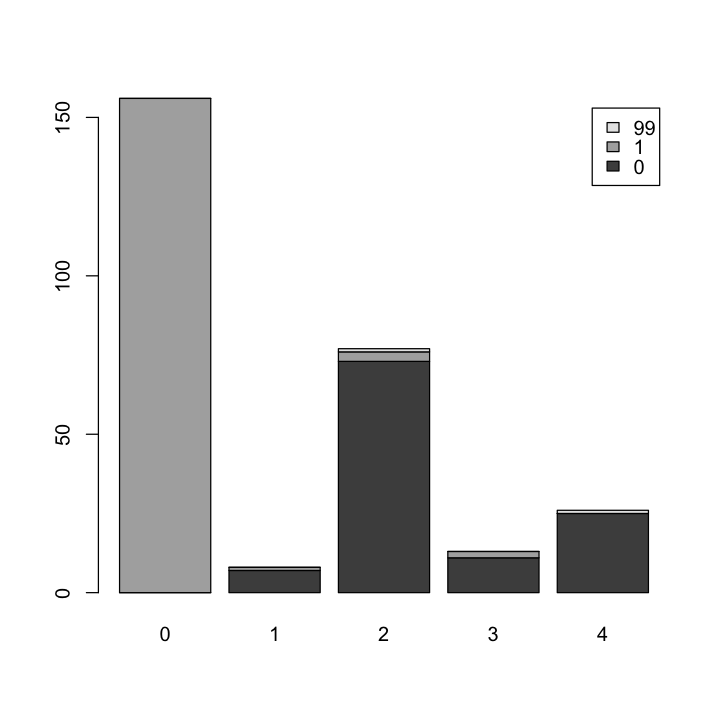

In [4]:
options(repr.plot.width=6, repr.plot.height=6)
barplot(table(clinical_data$DTHVNT, clinical_data$DTHHRDY),legend.text=TRUE)

We can clearly see that this is indeed the case. Therefore, we can consider the `DTHVNT` variable as largely redundant and discard it from our analysis for the remainder of this project.

In order to have a visual representation of the distributions of the clinical variables, we now plot histograms for all the variables we have determined to be relevant.

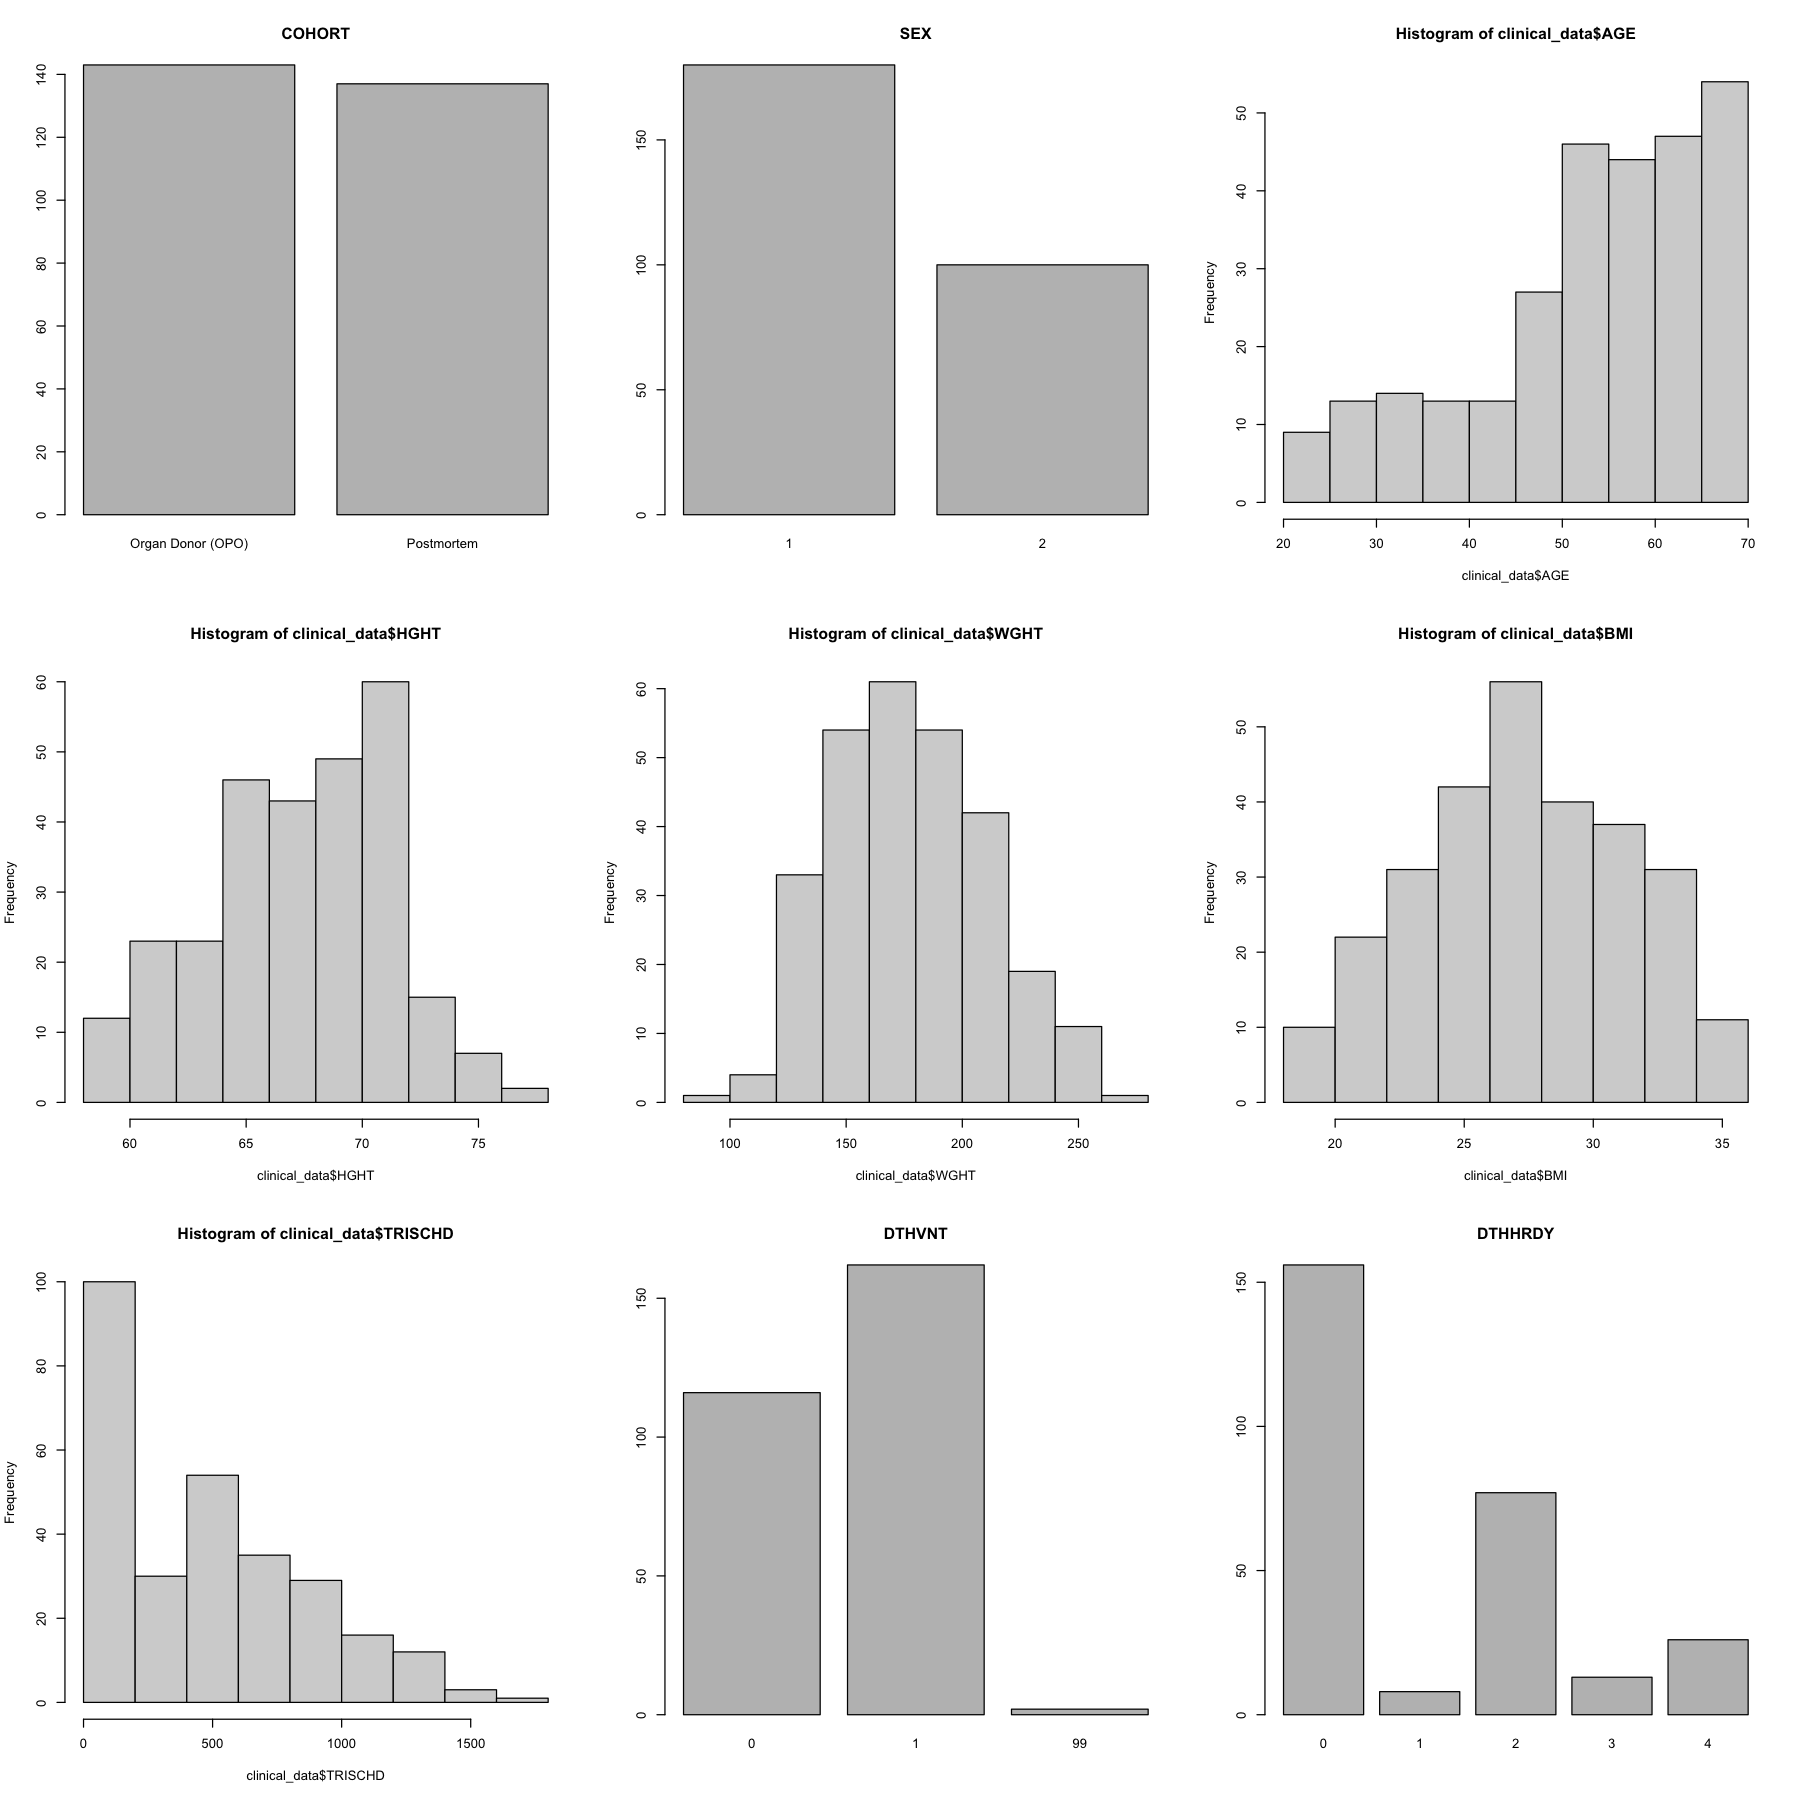

In [5]:
par(mfrow = c(3, 3)) 
options(repr.plot.width=15, repr.plot.height=15)

barplot(table(clinical_data$COHORT), main="COHORT")
barplot(table(clinical_data$SEX), main="SEX")
hist(clinical_data$AGE)
hist(clinical_data$HGHT)
hist(clinical_data$WGHT)
hist(clinical_data$BMI)
hist(clinical_data$TRISCHD)
barplot(table(clinical_data$DTHVNT), main="DTHVNT")
barplot(table(clinical_data$DTHHRDY), main="DTHHRDY")

Now we will explore the pairwise relationships between each variable. Since there are $8$ variables, this means there are $\binom{8}{2}=28$ binary relationships to explore. This a lot so we will try to groups the plots together. First we begin with the pairwise relationships between categorical variables, which we representent by using barplots.

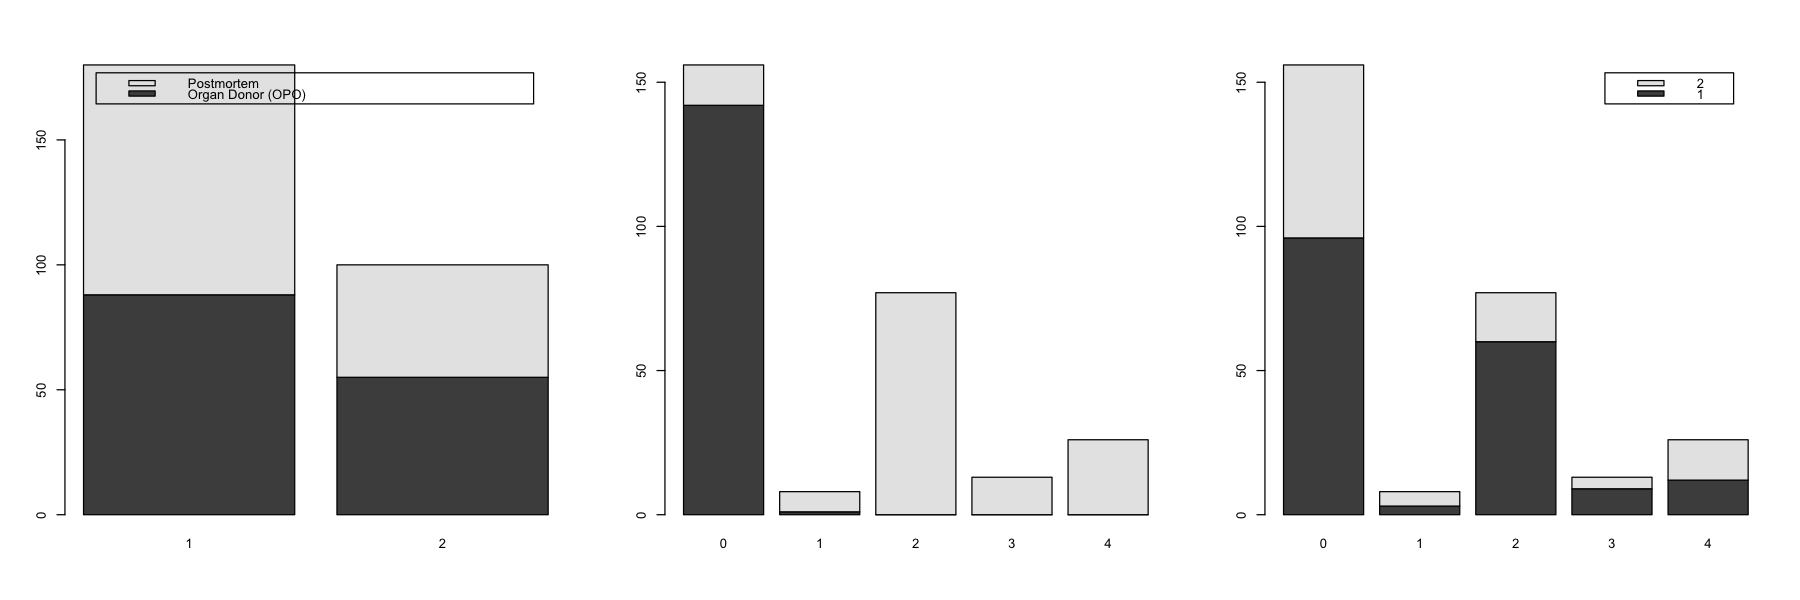

In [6]:
par(mfrow = c(1, 3)) 
options(repr.plot.width=15, repr.plot.height=5)
barplot(table(clinical_data$COHORT, clinical_data$SEX),legend.text=TRUE)
barplot(table(clinical_data$COHORT, clinical_data$DTHHRDY))
barplot(table(clinical_data$SEX, clinical_data$DTHHRDY),legend.text=TRUE)

To evaluate whether the categorical variables are independant of each other, we run a Pearson's chi-squared test for all pairs of categorical variables

In [7]:
chisq.test(clinical_data$COHORT, clinical_data$SEX)
chisq.test(clinical_data$COHORT, clinical_data$DTHHRDY)
chisq.test(clinical_data$SEX, clinical_data$DTHHRDY)


	Pearson's Chi-squared test with Yates' continuity correction

data:  clinical_data$COHORT and clinical_data$SEX
X-squared = 0.73176, df = 1, p-value = 0.3923


Warning message in chisq.test(clinical_data$COHORT, clinical_data$DTHHRDY):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  clinical_data$COHORT and clinical_data$DTHHRDY
X-squared = 225.5, df = 4, p-value < 2.2e-16


Warning message in chisq.test(clinical_data$SEX, clinical_data$DTHHRDY):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  clinical_data$SEX and clinical_data$DTHHRDY
X-squared = 13.111, df = 4, p-value = 0.01075


We also run Fisher's exact test for each pair.

In [8]:
fisher.test(clinical_data$COHORT, clinical_data$SEX)
fisher.test(clinical_data$COHORT, clinical_data$DTHHRDY)
fisher.test(clinical_data$SEX, clinical_data$DTHHRDY)


	Fisher's Exact Test for Count Data

data:  clinical_data$COHORT and clinical_data$SEX
p-value = 0.3827
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4647701 1.3157458
sample estimates:
odds ratio 
 0.7833011 



	Fisher's Exact Test for Count Data

data:  clinical_data$COHORT and clinical_data$DTHHRDY
p-value < 2.2e-16
alternative hypothesis: two.sided



	Fisher's Exact Test for Count Data

data:  clinical_data$SEX and clinical_data$DTHHRDY
p-value = 0.008351
alternative hypothesis: two.sided


The two tests agree on concluding that the variables `COHORT` and `SEX` are independant while `COHORT` and `DTHHRDY` are not, as well as `SEX` and `DTHHRDY`.

Next we represent how each continuous variable is distributed in each category of the categorical variables. This requires the use of boxplots.

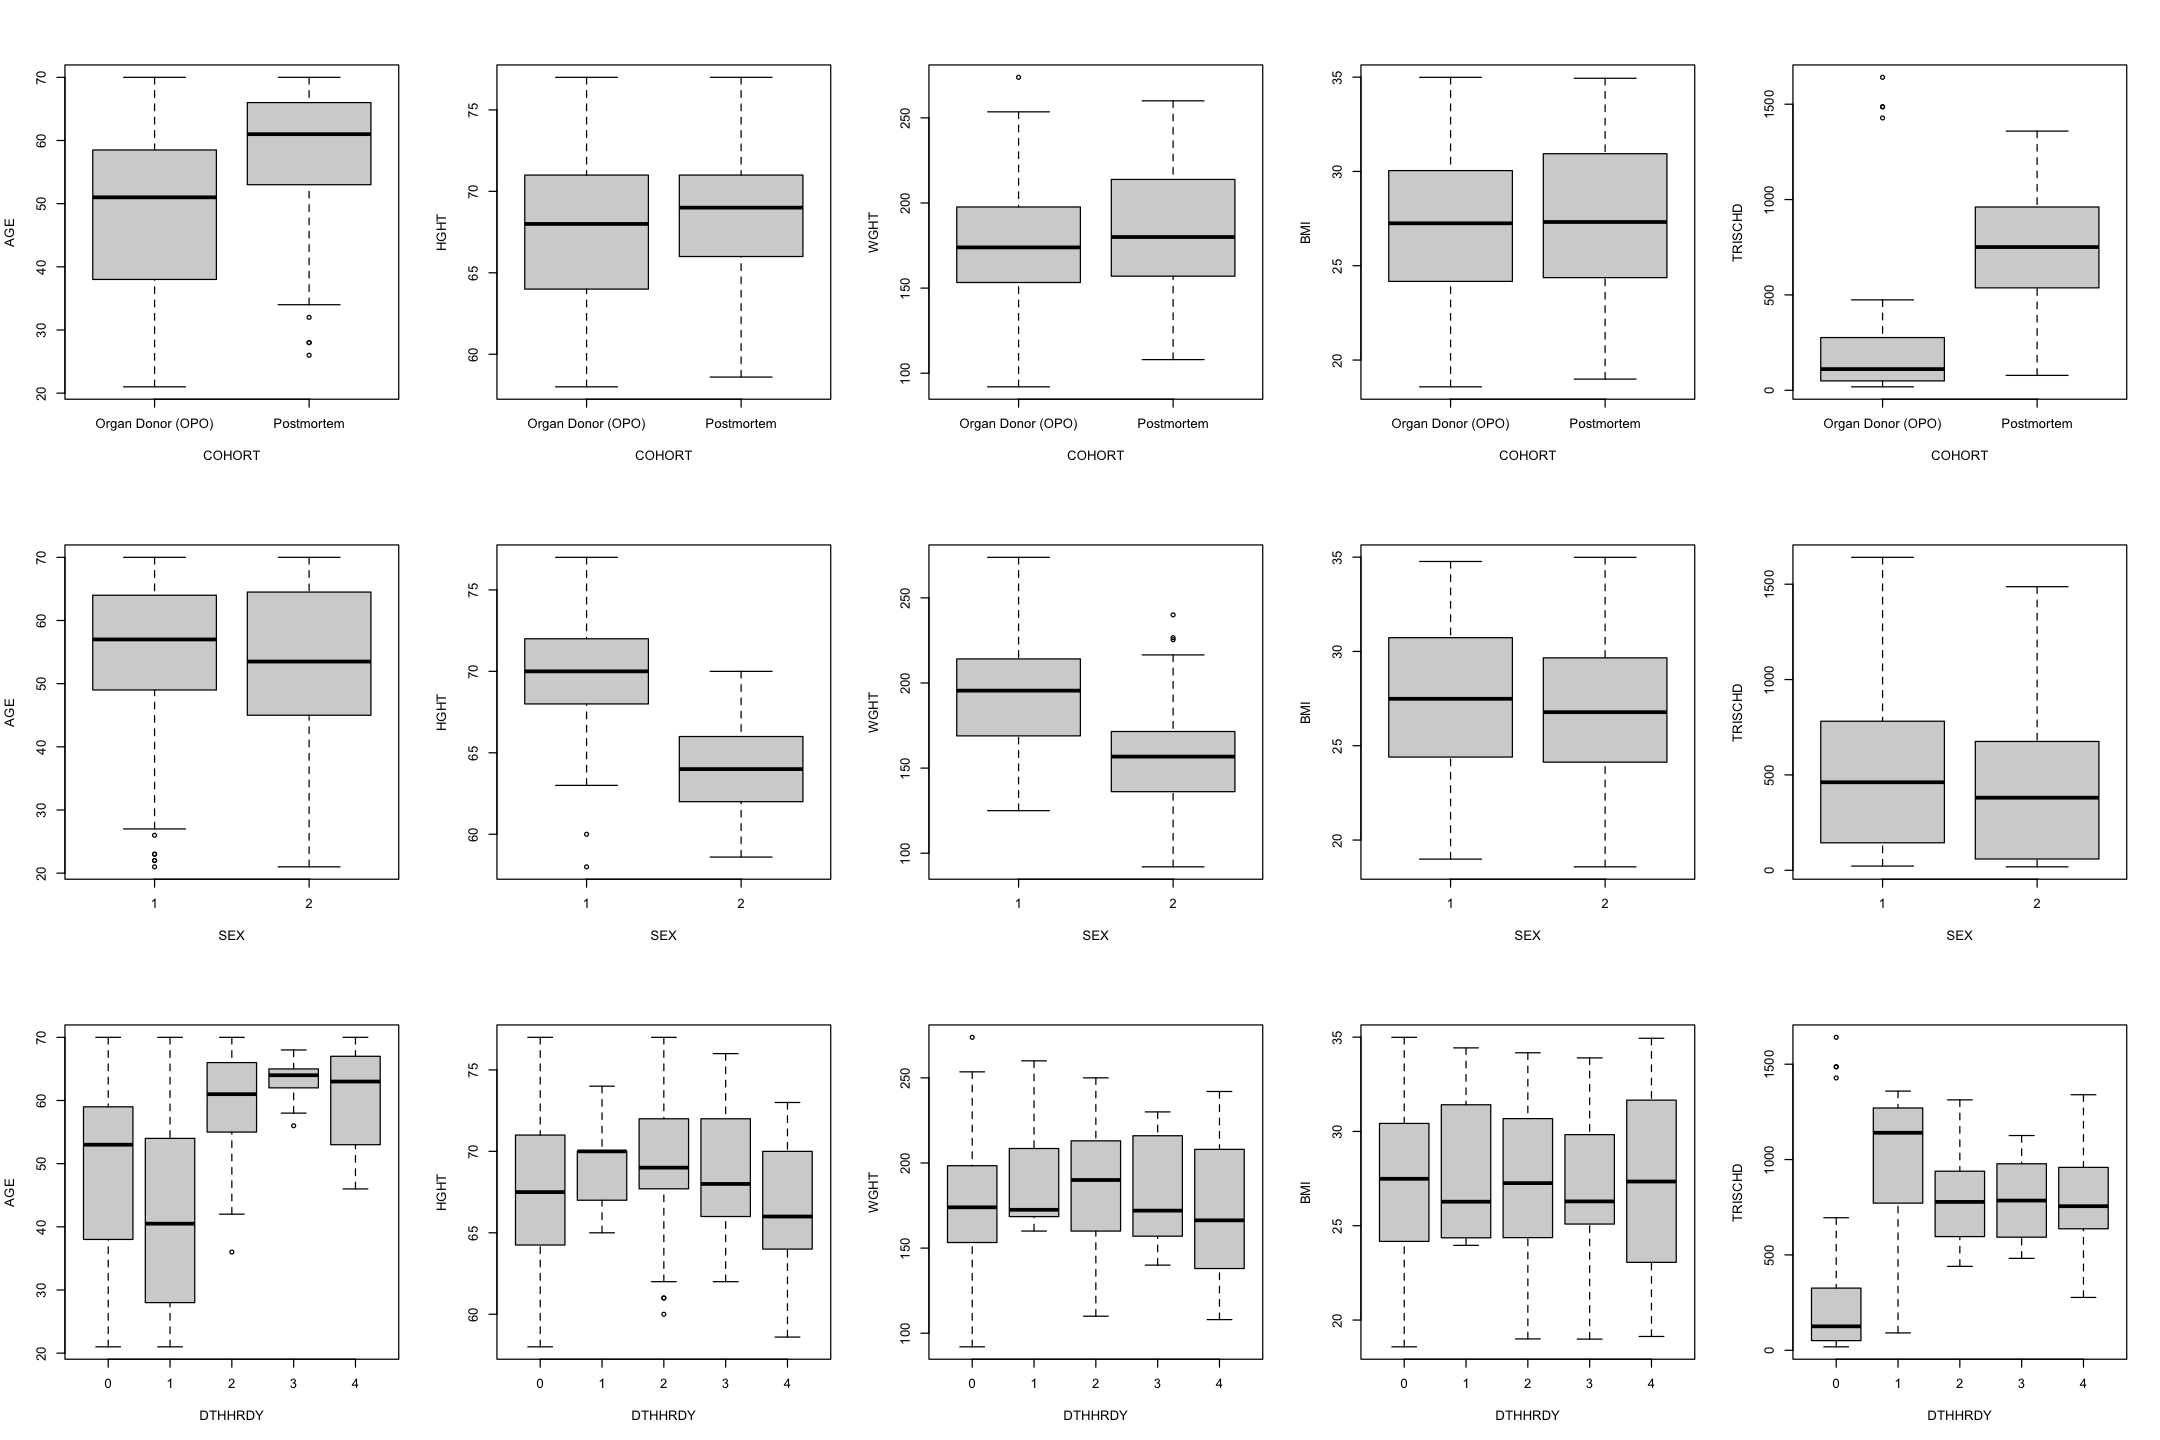

In [9]:
par(mfrow = c(3, 5))
options(repr.plot.width=18, repr.plot.height=12)
for (catvar in c('COHORT','SEX','DTHHRDY')){
    for (contvar in c('AGE','HGHT','WGHT','BMI','TRISCHD')){
        boxplot(as.formula(paste(contvar,"~",catvar)), data=clinical_data)
    }
}

In [16]:
for (catvar in c('COHORT','SEX','DTHHRDY')){
    for (contvar in c('AGE','HGHT','WGHT','BMI','TRISCHD')){
        print(kruskal.test(as.formula(paste(contvar,"~",catvar)), data=clinical_data))
    }
}


	Kruskal-Wallis rank sum test

data:  AGE by COHORT
Kruskal-Wallis chi-squared = 42.838, df = 1, p-value = 5.947e-11


	Kruskal-Wallis rank sum test

data:  HGHT by COHORT
Kruskal-Wallis chi-squared = 4.7196, df = 1, p-value = 0.02982


	Kruskal-Wallis rank sum test

data:  WGHT by COHORT
Kruskal-Wallis chi-squared = 4.1733, df = 1, p-value = 0.04107


	Kruskal-Wallis rank sum test

data:  BMI by COHORT
Kruskal-Wallis chi-squared = 0.30004, df = 1, p-value = 0.5839


	Kruskal-Wallis rank sum test

data:  TRISCHD by COHORT
Kruskal-Wallis chi-squared = 173.68, df = 1, p-value < 2.2e-16


	Kruskal-Wallis rank sum test

data:  AGE by SEX
Kruskal-Wallis chi-squared = 1.9821, df = 1, p-value = 0.1592


	Kruskal-Wallis rank sum test

data:  HGHT by SEX
Kruskal-Wallis chi-squared = 147.65, df = 1, p-value < 2.2e-16


	Kruskal-Wallis rank sum test

data:  WGHT by SEX
Kruskal-Wallis chi-squared = 65.369, df = 1, p-value = 6.21e-16


	Kruskal-Wallis rank sum test

data:  BMI by SEX
Kruskal-Walli

And finally we show graphs of the relationships between each pair of continuous variables. We include on each graph the line of regression computed by the `lm` function for the relationship.

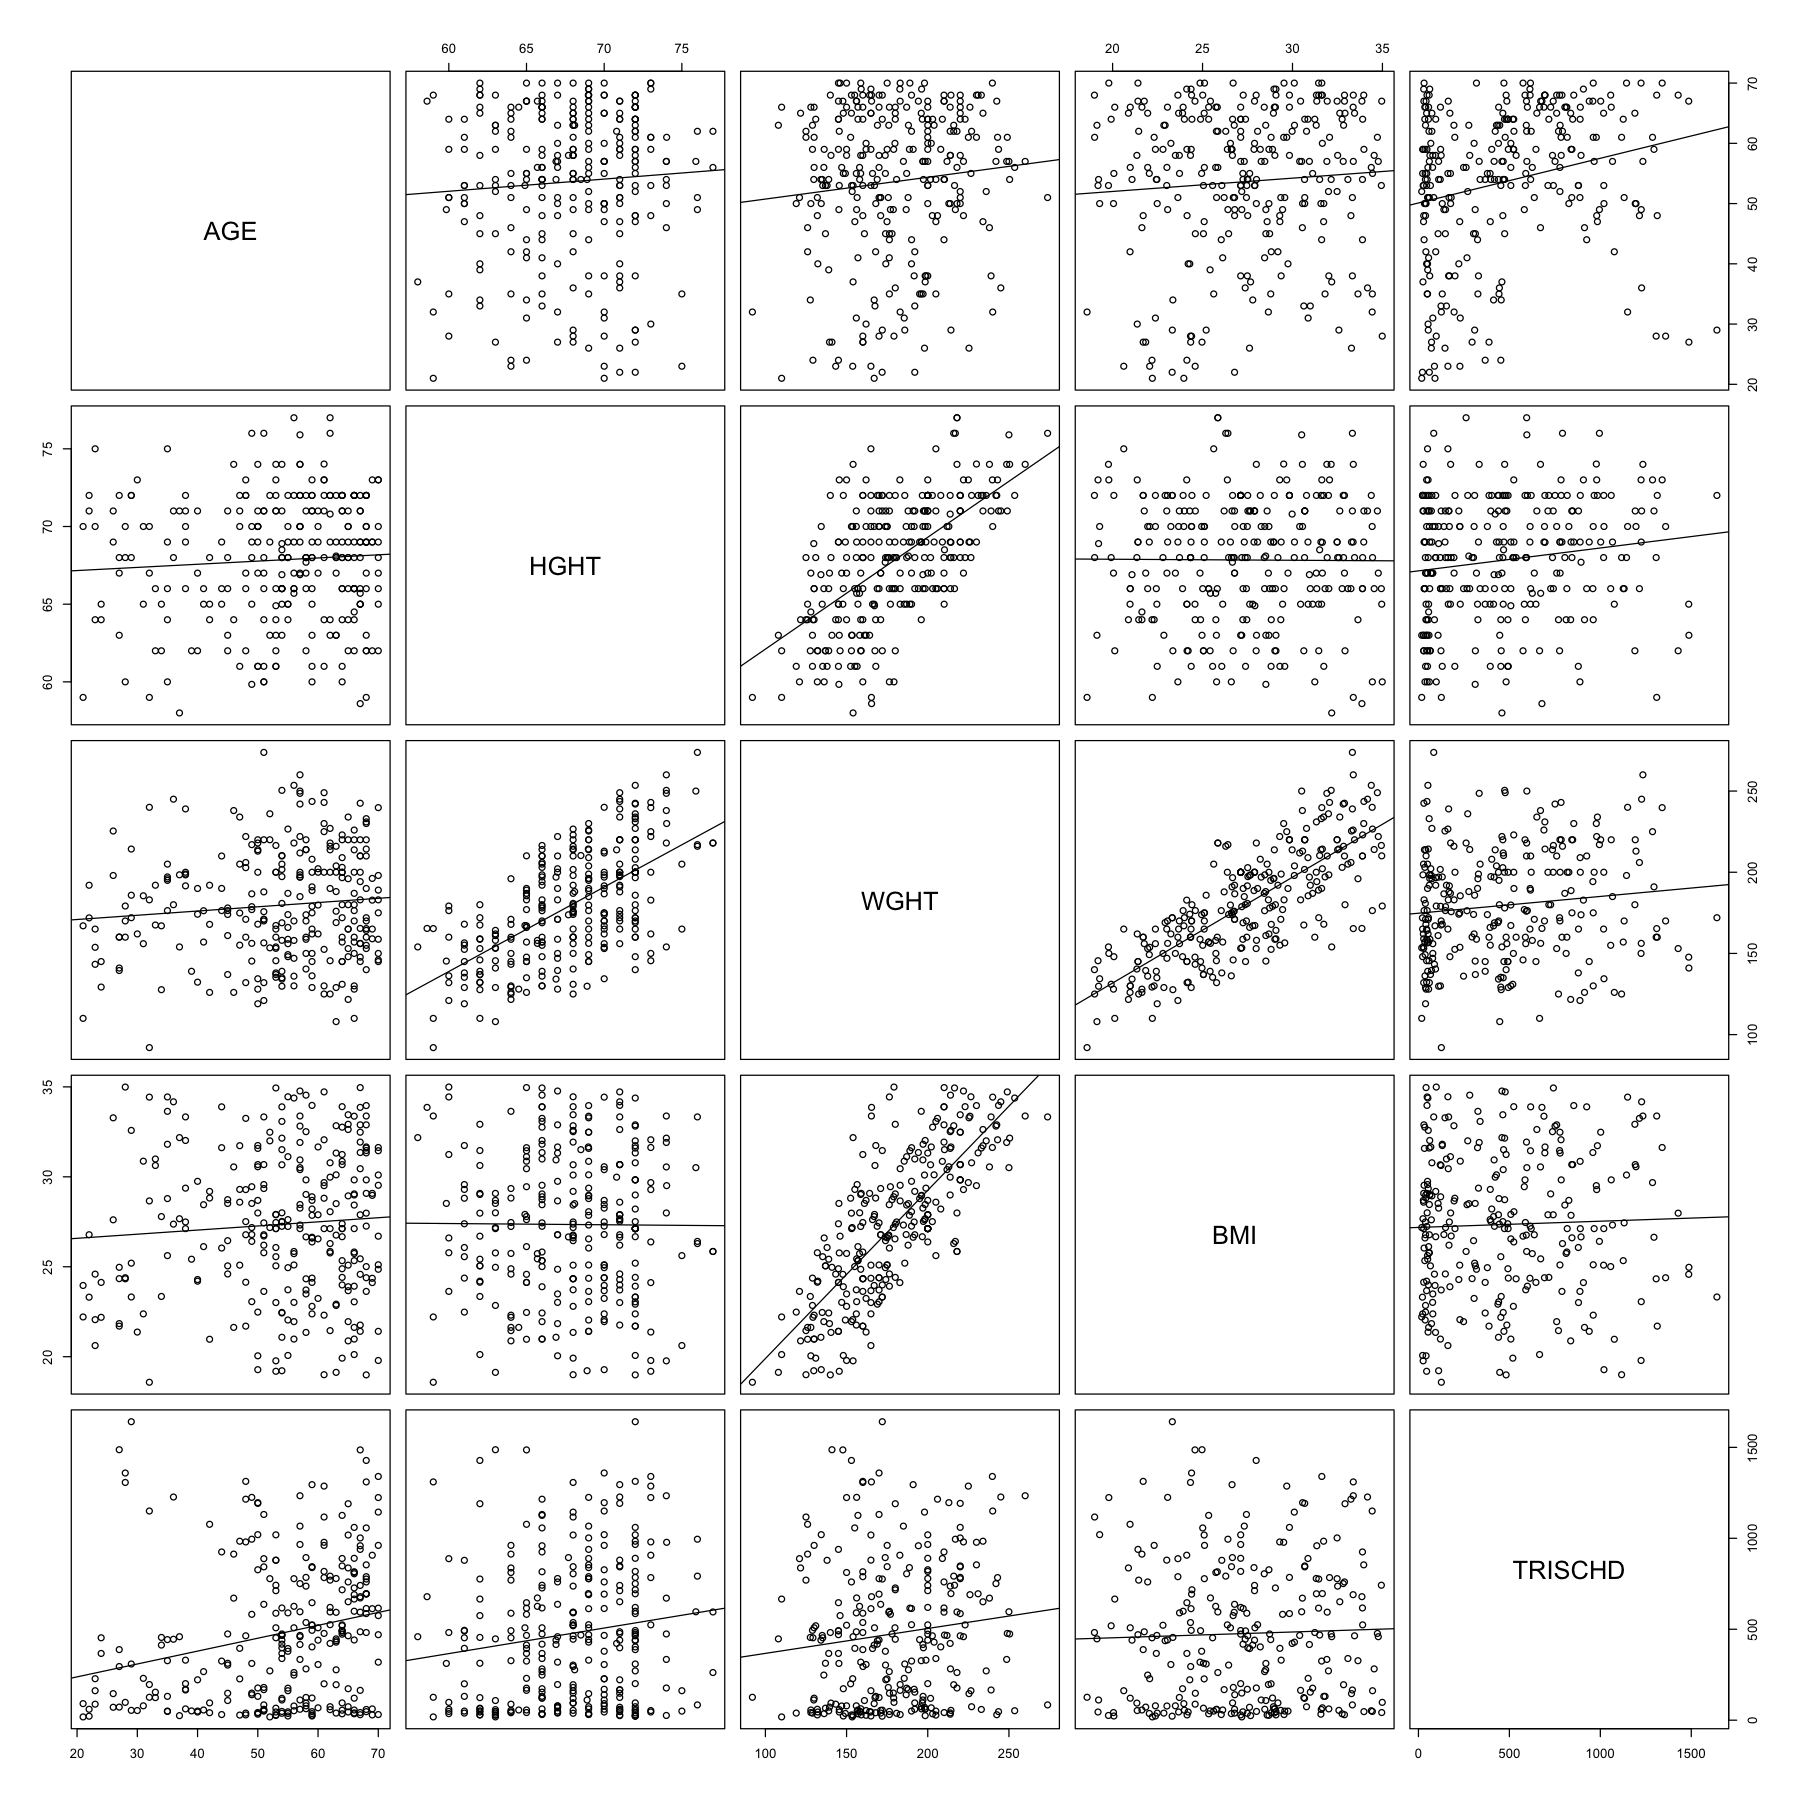

In [223]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(~ AGE + HGHT + WGHT + BMI + TRISCHD, data=clinical_data, panel=function(x,y){
  points(x,y)
  linear_regression = lm(y~x)
  linear_regression_line = abline(linear_regression)
})

In [327]:
for (contvar1 in c('AGE','HGHT','WGHT','BMI','TRISCHD')){
    for (contvar2 in c('AGE','HGHT','WGHT','BMI','TRISCHD')){
        if (contvar1!=contvar2){
            print(as.formula(paste(contvar1,"~",contvar2)))
            print(summary(lm(as.formula(paste(contvar1,"~",contvar2)), data=clinical_data)))
        }
    }
}

AGE ~ HGHT

Call:
lm(formula = as.formula(paste(contvar1, "~", contvar2)), data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.072  -6.336   2.137  10.336  17.549 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  39.8850    12.8639   3.101  0.00213 **
HGHT          0.2027     0.1893   1.071  0.28520   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.63 on 278 degrees of freedom
Multiple R-squared:  0.004107,	Adjusted R-squared:  0.0005251 
F-statistic: 1.147 on 1 and 278 DF,  p-value: 0.2852

AGE ~ WGHT

Call:
lm(formula = as.formula(paste(contvar1, "~", contvar2)), data = clinical_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.176  -6.001   2.211  10.347  17.621 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 47.12750    4.06105  11.605   <2e-16 ***
WGHT         0.03622    0.02221   1.631    0.104    
---
Signif. codes:  0 ‘***’ 0.0

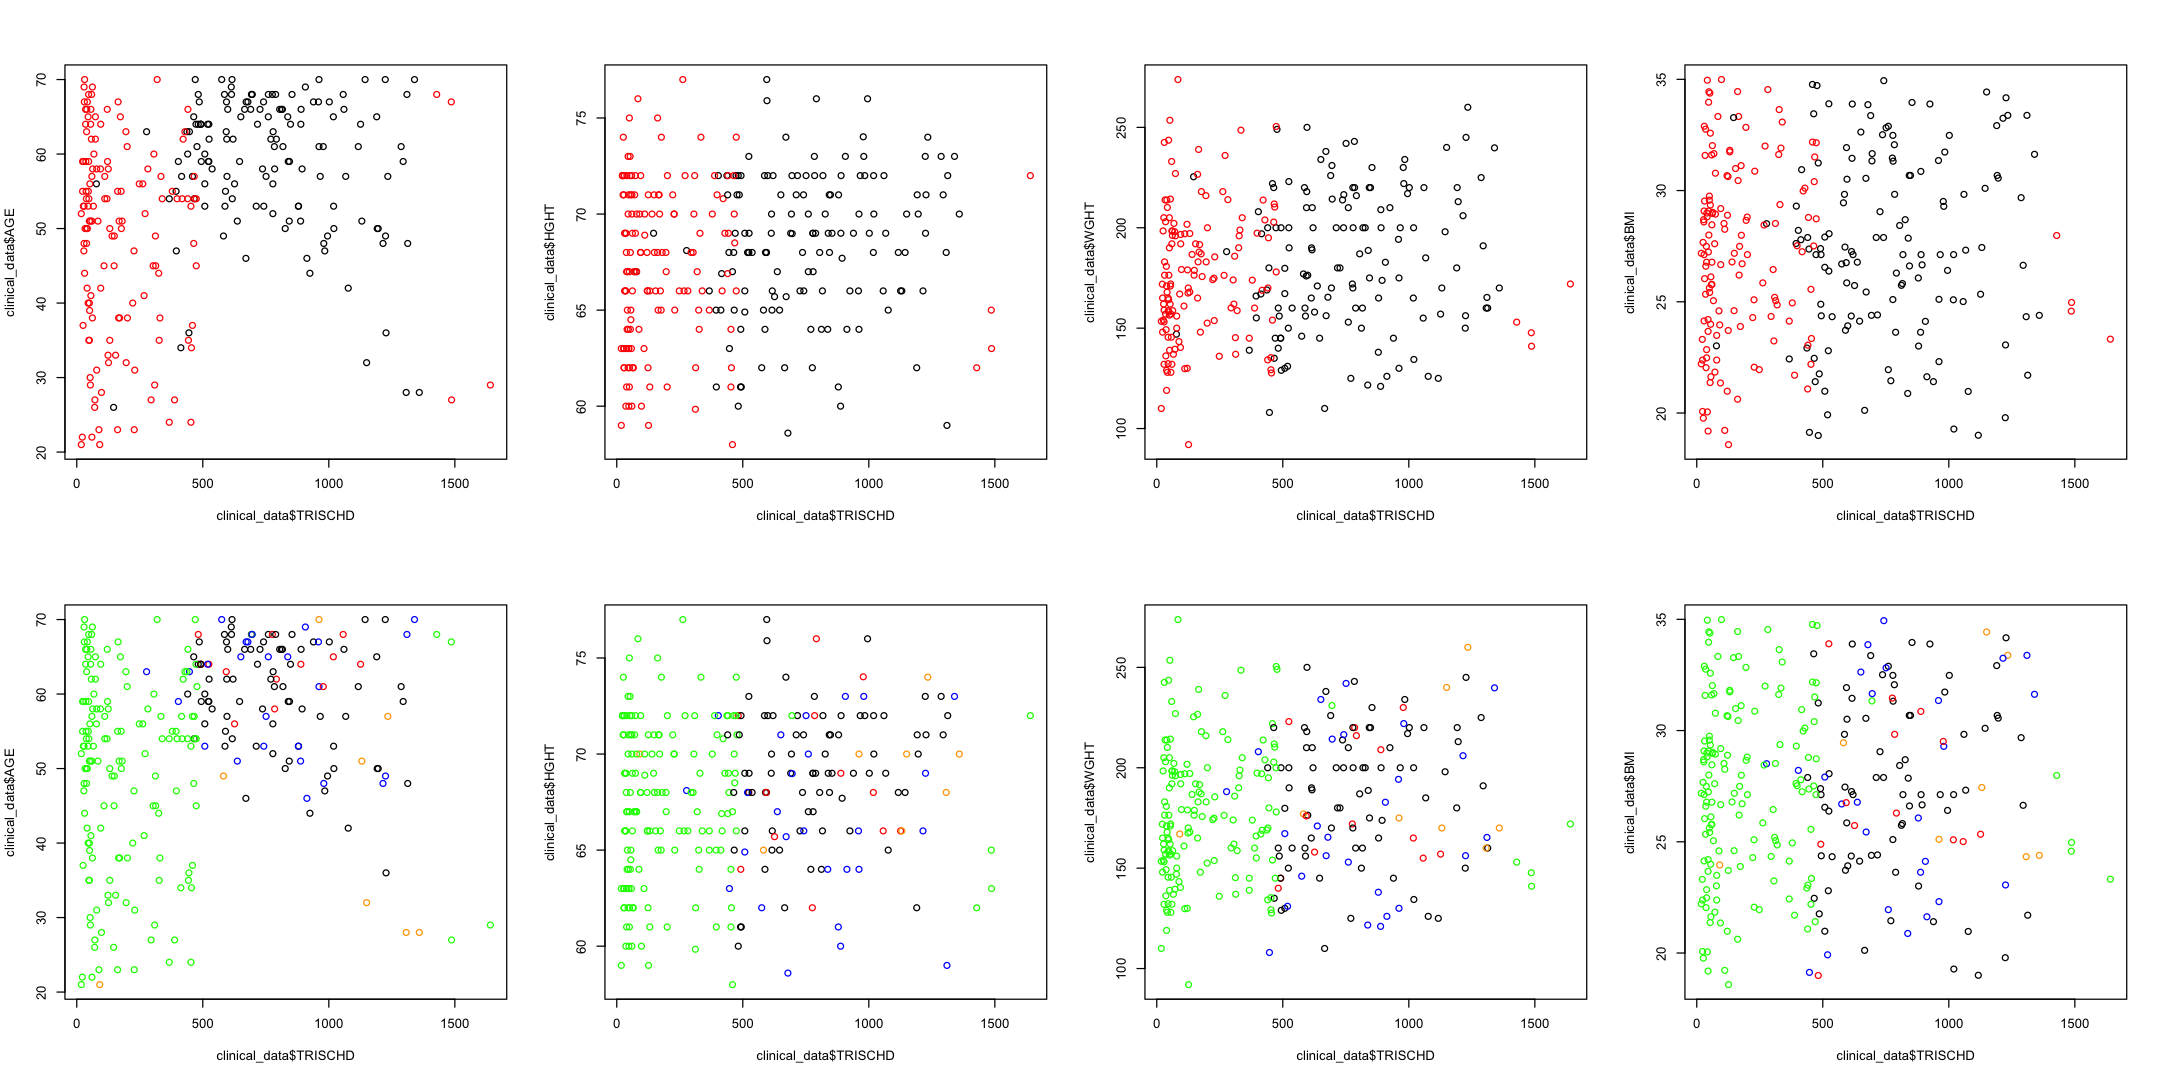

In [94]:
par(mfrow = c(2, 4))
options(repr.plot.width=18, repr.plot.height=9)
plot(clinical_data$TRISCHD, clinical_data$AGE, col = ifelse(clinical_data$COHORT == "Organ Donor (OPO)", "red", "black"))
plot(clinical_data$TRISCHD, clinical_data$HGHT, col = ifelse(clinical_data$COHORT == "Organ Donor (OPO)", "red", "black"))
plot(clinical_data$TRISCHD, clinical_data$WGHT, col = ifelse(clinical_data$COHORT == "Organ Donor (OPO)", "red", "black"))
plot(clinical_data$TRISCHD, clinical_data$BMI, col = ifelse(clinical_data$COHORT == "Organ Donor (OPO)", "red", "black"))
plot(clinical_data$TRISCHD, clinical_data$AGE, col = c("green", "orange", "black", "red", "blue")[clinical_data$DTHHRDY +1])
plot(clinical_data$TRISCHD, clinical_data$HGHT, col = c("green", "orange", "black", "red", "blue")[clinical_data$DTHHRDY +1])
plot(clinical_data$TRISCHD, clinical_data$WGHT, col = c("green", "orange", "black", "red", "blue")[clinical_data$DTHHRDY +1])
plot(clinical_data$TRISCHD, clinical_data$BMI, col = c("green", "orange", "black", "red", "blue")[clinical_data$DTHHRDY +1])

In [6]:
install.packages("corrplot")
library("corrplot")


Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


corrplot 0.92 loaded



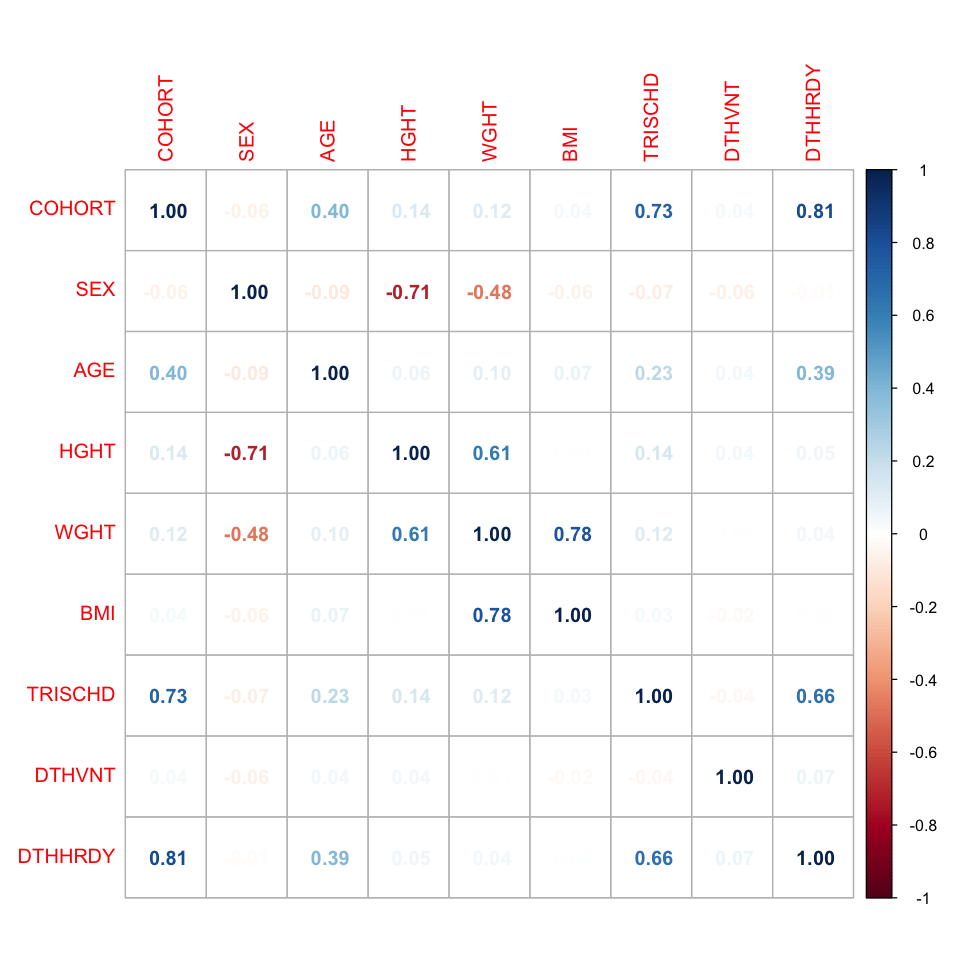

In [7]:
options(repr.plot.width=8, repr.plot.height=8)

COHORT = as.numeric(factor(clinical_data$COHORT))
M = cor(cbind(COHORT,clinical_data[,c(4,5,6,7,8,10,11,12)]))
corrplot(M, method = 'number')

## Question 2. Clinical data vs morphology

In [333]:
# Read the TSV file into a data frame
morphological_counts_init <- read.table("morphological_counts_lunit_dino.tsv", header = TRUE, sep = "\t")

#Give proper names to the rows of the morphological counts matrix
rownames(morphological_counts_init)<-morphological_counts_init$SMPLID

In [334]:
morphological_counts<-t(morphological_counts_init[,-1])
head(morphological_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
Mophological.cluster.G4_0,137,96,2,339,171,2,1,392,40,260,⋯,2,39,0,77,6,32,5,94,460,1
Mophological.cluster.G4_1,88,880,552,1,0,10,239,18,424,235,⋯,286,34,277,271,537,7,18,228,314,308
Mophological.cluster.G4_2,417,236,211,151,36,258,850,14,605,164,⋯,541,634,333,193,208,2,26,79,43,102
Mophological.cluster.G4_3,1,393,1031,637,791,1558,282,10,135,2,⋯,35,109,339,408,72,24,194,83,7,73
Mophological.cluster.G4_4,1,21,174,1844,1011,850,41,316,94,344,⋯,0,46,260,63,3,184,398,158,2,7
Mophological.cluster.G4_5,32,214,216,473,234,48,206,57,58,313,⋯,412,28,248,78,48,200,10,219,246,95


### 2.1 Compute systematically associations between clinical variables and morphological cluster counts.

The 5 demographics/health variables are `AGE`, `SEX`, `HGHT`, `WGHT` and `BMI`. The 3 technical variables are `COHORT`, `TRISCHD`, `DTHHRDY`.
The goal of this section is to compare the magnitude of the associations of the different clinical variables with morphology. For that, we will perform differential morphological cluster expression (DME) with edgeR. Note that we used edgeR to realize the differential expression analysis for question 2 and DESeq2 for question 3 so that we can explore the two methods. Let's define a function `DME`  that allows to perform an automatized procedure of differential morphological expression.

In [303]:
library(edgeR)

DME <- function(clinical_variable){

    # Create the differential expression data structure used by edgeR (DGEList)
    DGE_list <- DGEList(counts = morphological_counts, group = clinical_data[[clinical_variable]])
    
    # Filter lowly expressed morphological clusters
    keep <- filterByExpr(DGE_list)
    DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]
    
    # Normalize the data
    DGE_list <- normLibSizes(DGE_list)

    # Create a design matrix
    formula <- as.formula(paste("~clinical_data$", clinical_variable))
    design <- model.matrix(formula)
    
    #Estimate the dispersion
    DGE_list <- estimateDisp(DGE_list, design)

    # Fit the model and test for differential expression
    fit <- glmQLFit(DGE_list,design)
    qlf <- glmQLFTest(fit,coef=2)

    # We take the top 10 most significant differentially expressed morphological counts. We also remove the logCPM just to have a clearer print for the results.
    return (topTags(qlf, n = 32)$table[ ,-2])
}

Le chargement a nécessité le package : limma


Attachement du package : ‘limma’


L'objet suivant est masqué depuis ‘package:DESeq2’:

    plotMA


L'objet suivant est masqué depuis ‘package:BiocGenerics’:

    plotMA




In [306]:
# Create a list DME that will contain the results of differential morphological expression
DME_clinical_variable <- list()

# Iterate through each clinical variables and apply the function DME on them
for (variable in colnames(clinical_data[,-c(1,2,9,11,13,14)])){
    DME_clinical_variable[[variable]] <- DME(variable)
}
# Print the final results of the 8 DME
print(DME_clinical_variable)

$COHORT
                                  logFC            F       PValue          FDR
Mophological.cluster.G4_28 -0.530987049 3.379524e+01 1.653581e-08 2.618369e-07
Mophological.cluster.G4_18  1.654992542 3.367730e+01 1.745579e-08 2.618369e-07
Mophological.cluster.G4_14  1.431838659 3.062862e+01 7.138854e-08 7.138854e-07
Mophological.cluster.G4_1  -1.390385322 2.819617e+01 2.224324e-07 1.668243e-06
Mophological.cluster.G4_30  0.811222003 2.573890e+01 7.096961e-07 4.258177e-06
Mophological.cluster.G4_2  -1.073094984 2.461767e+01 1.210140e-06 6.050701e-06
Mophological.cluster.G4_0   1.315591065 2.257304e+01 3.225597e-06 1.382399e-05
Mophological.cluster.G4_9  -0.628016370 2.080725e+01 7.581662e-06 2.843123e-05
Mophological.cluster.G4_4   1.314871452 2.008645e+01 1.077061e-05 3.590202e-05
Mophological.cluster.G4_12  1.530715841 1.957411e+01 1.383483e-05 4.150450e-05
Mophological.cluster.G4_6   1.601564628 1.911839e+01 1.729588e-05 4.717058e-05
Mophological.cluster.G4_25 -1.377063047 1.74

### 2.2 Discuss the association with technical variables

### 2.3 For non-technical variables, redo the analysis with adjustment for the confounding technical variables

As a reminder, we obtained in question 1 the following cofounded variables : 

Clinical variables (demographic/health variables) : 

- `AGE` is cofounded by `TRISCHD`, `COHORT` and `DTHHRDY`
- `SEX` is cofounded by `DTHHRDY`
- `HGHT` is cofounded by `TRISCHD`, `COHORT` and `DTHHRDY`
- `WGHT` is cofounded by `TRISCHD` and `COHORT`
- `BMI` is not cofounded by any technical variable.

Let us define another function `DME_cofounding` that allows to take into account the cofounded variables for each health variables.

In [307]:
DME_confounding <- function(clinical_variable, formula_confounded){

    # Create the differential expression data structure used by edgeR (DGEList)
    DGE_list <- DGEList(counts = morphological_counts, group = clinical_data[[clinical_variable]])
    
    # Filter lowly expressed morphological clusters
    keep <- filterByExpr(DGE_list)
    DGE_list <- DGE_list[keep, , keep.lib.sizes=FALSE]
    # Normalize the data
    DGE_list <- normLibSizes(DGE_list)

    # Create a design matrix
    formula <- as.formula(formula_confounded)
    design <- model.matrix(formula)
    
    #Estimate the dispersion
    DGE_list <- estimateDisp(DGE_list, design)

    # Fit the model and test for differential expression
    fit <- glmQLFit(DGE_list,design)
    qlf <- glmQLFTest(fit,coef=2)

    # We take the top 10 most significant differentially expressed morphological counts. We also remove the logCPM just to have a clearer print for the results.
    return (topTags(qlf, n = 32)$table[ ,-2])
}

In [308]:
non_technical_variables = c("AGE", "SEX", "HGHT", "WGHT", "BMI")
formulas_confounding = c("~clinical_data$AGE + clinical_data$TRISCHD + clinical_data$COHORT + clinical_data$DTHHRDY", 
                      "~clinical_data$SEX + clinical_data$DTHHRDY",
                      "~clinical_data$HGHT + clinical_data$TRISCHD + clinical_data$COHORT + clinical_data$DTHHRDY",
                      "~clinical_data$WGHT + clinical_data$TRISCHD + clinical_data$COHORT",
                       "~clinical_data$BMI")

In [309]:
# Create a list DME that will contain the results of differential morphological expression
DME_confounded_non_technical_variable <- list()

# Iterate through each clinical variables and apply the function DME on them
for (i in 1:length(non_technical_variables)){
    variable = non_technical_variables[i]
    formula = formulas_confounding[i]
    DME_confounded_non_technical_variable[[variable]] <- DME_confounding(variable, formula)
}
# Print the final results of the 5 DME considering confounded variables
print(DME_confounded_non_technical_variable)

$AGE
                                  logFC           F       PValue          FDR
Mophological.cluster.G4_29  0.074390692 37.14499777 3.625118e-09 1.160038e-07
Mophological.cluster.G4_26 -0.048273982 35.31663532 8.317309e-09 1.235834e-07
Mophological.cluster.G4_11 -0.062146915 34.59048010 1.158594e-08 1.235834e-07
Mophological.cluster.G4_12  0.091901647 33.74396658 1.707089e-08 1.365672e-07
Mophological.cluster.G4_8   0.066516525 25.33738686 8.631366e-07 5.524074e-06
Mophological.cluster.G4_15 -0.030972839 24.70936466 1.163830e-06 6.207096e-06
Mophological.cluster.G4_0   0.064859887 21.40208419 5.700941e-06 2.606145e-05
Mophological.cluster.G4_27  0.034598482 13.92825968 2.300322e-04 9.201289e-04
Mophological.cluster.G4_22  0.032902896 11.34045483 8.647828e-04 3.074783e-03
Mophological.cluster.G4_18 -0.034119873 10.83094091 1.126268e-03 3.604057e-03
Mophological.cluster.G4_4   0.031498612  5.86141819 1.611305e-02 4.687432e-02
Mophological.cluster.G4_20 -0.018678446  3.73337273 5.43454

## Question 3. Morphology vs gene expression

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

In [ ]:
library(DESeq2)

In [286]:
# Read the TSV file into a data frame
RNA_read_counts_init <- read.table("RNA_read_counts.tsv", header = TRUE, sep = "\t")

rownames(RNA_read_counts_init)<-RNA_read_counts_init$Name
RNA_read_counts_unfiltered<-as.matrix(RNA_read_counts_init[,-c(1,2)])
dim(RNA_read_counts_unfiltered)

[1] 56200   280

Let $X=\{x_1,\ldots,x_n\}$ be a sample of a univariate random variable. The _mean absolute deviation_ of $X$ is defined as the median of the absolute deviations from the sample's median, or in symbolic form

\begin{equation*}
\mathrm{MAD}=\mathrm{median}(\{\vert x_i-\mathrm{median}(X)\vert\,\vert\,i=1,\ldots,n\})
\end{equation*}

In [199]:
MAD<-numeric(nrow(RNA_read_counts_unfiltered))
for (i in 1:nrow(RNA_read_counts_unfiltered)){
    MAD[i]<-mad(RNA_read_counts_unfiltered[i,])
}
#Get the indices of the transcripts which are extremely little expressed
rows_to_remove<-which(MAD==0)

In [200]:
summary(MAD)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      0.7    393.5     48.9 394697.8 

In [201]:
RNA_read_counts<-RNA_read_counts_unfiltered[-rows_to_remove,]
dim(RNA_read_counts)
head(RNA_read_counts)

[1] 28105   280

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
ENSG00000227232.5,78,70,180,78,152,76,132,143,88,143,⋯,134,142,140,69,183,61,157,103,57,70
ENSG00000233750.3,1,2,0,1,0,3,0,0,0,2,⋯,10,1,3,2,0,0,2,1,0,2
ENSG00000268903.1,29,41,103,36,15,52,8,17,32,47,⋯,158,14,161,86,15,14,33,35,93,37
ENSG00000269981.1,13,25,66,29,5,42,5,4,29,18,⋯,122,6,76,173,5,14,14,17,100,26
ENSG00000241860.6,2,17,70,27,11,19,4,5,25,36,⋯,26,24,39,76,21,16,21,22,28,2
ENSG00000279928.2,0,1,4,4,0,0,0,0,2,0,⋯,4,1,4,5,0,2,0,0,0,0


In [367]:
log_morphological_counts<-as.matrix(log10(morphological_counts_init[,-1]+1))
coldata<-cbind(log_morphological_counts,COHORT=as.factor(clinical_data$COHORT),TRISCHD=as.numeric(clinical_data$TRISCHD),DTHHRDY=as.factor(clinical_data$DTHHRDY))
head(coldata)

,Mophological.cluster.G4_0,Mophological.cluster.G4_1,Mophological.cluster.G4_2,Mophological.cluster.G4_3,Mophological.cluster.G4_4,Mophological.cluster.G4_5,Mophological.cluster.G4_6,Mophological.cluster.G4_7,Mophological.cluster.G4_8,Mophological.cluster.G4_9,⋯,Mophological.cluster.G4_25,Mophological.cluster.G4_26,Mophological.cluster.G4_27,Mophological.cluster.G4_28,Mophological.cluster.G4_29,Mophological.cluster.G4_30,Mophological.cluster.G4_31,COHORT,TRISCHD,DTHHRDY
GTEX.111YS.0526,2.1398791,1.949390,2.621176,0.301030,0.301030,1.518514,0.301030,0.301030,0.301030,2.225309,⋯,2.621176,1.908485,2.161368,2.399674,2.8228216,1.322219,0.000000,1,74,1
GTEX.1122O.1126,1.9867717,2.944976,2.374748,2.595496,1.342423,2.332438,0.301030,1.681241,1.602060,2.465383,⋯,2.695482,2.445604,2.889302,2.841985,2.4297523,2.164353,0.000000,1,35,1
GTEX.1128S.0326,0.4771213,2.742725,2.326336,3.013680,2.243038,2.336460,2.462398,0.000000,2.693727,2.822168,⋯,2.209515,1.919078,2.082785,2.577492,0.4771213,2.699838,0.000000,2,816,3
GTEX.117XS.0426,2.5314789,0.301030,2.181844,2.804821,3.265996,2.675778,2.416641,0.602060,2.644439,2.187521,⋯,1.698970,2.201397,2.326336,2.267172,2.1553360,2.444045,0.602060,2,848,3
GTEX.117YW.0226,2.2355284,0.000000,1.568202,2.898725,3.005181,2.371068,2.212188,0.000000,1.740363,2.113943,⋯,0.000000,1.886491,2.690196,1.838849,2.4502491,2.406540,0.845098,2,785,4
GTEX.11DXX.0426,0.4771213,1.041393,2.413300,3.192846,2.929930,1.690196,0.000000,1.079181,3.396548,2.513218,⋯,0.000000,1.431364,2.296665,2.510545,0.7781513,1.851258,0.000000,1,56,1


In [400]:
confounding_variables<-function(morphological_cluster){
    convar<-NULL
    if (morphological_cluster %in% rownames(DME('COHORT'))&DME('COHORT')[morphological_cluster,]$PValue<0.05)
        {convar<-c(convar,'COHORT')}
    if (morphological_cluster %in% rownames(DME('TRISCHD'))&DME('TRISCHD')[morphological_cluster,]$PValue<0.05)
        {convar<-c(convar,'TRISCHD')}
    if (morphological_cluster %in% rownames(DME('DTHHRDY'))&DME('DTHHRDY')[morphological_cluster,]$PValue<0.05)
        {convar<-c(convar,'DTHHRDY')}
    return (convar)
}

In [401]:
designFormula<-function(morphological_cluster){
    convars<-confounding_variables(morphological_cluster)
    
    if (length(convars)==0)
        formula<-as.formula(paste('~',morphological_cluster))
    if (length(convars)==1)
        formula<-as.formula(paste('~',convars[1],'+',morphological_cluster))
    if (length(convars)==2)
        formula<-as.formula(paste('~',convars[1],'+',convars[2],'+',morphological_cluster))
    if (length(convars)==3)
        formula<-as.formula(paste('~',convars[1],'+',convars[2],'+',convars[3],'+',morphological_cluster))
    return (formula)
}

In [402]:
DGE<-function(morphological_cluster){
    design_formula<-designFormula(morphological_cluster)
    object<-DESeqDataSetFromMatrix(countData = RNA_read_counts,
                                   colData = coldata,
                                   design = design_formula)
    DGEresults<-results(DESeq(object),name=morphological_cluster)
    return (DGEresults)
}

In [404]:
set.seed(2024)

DE_genes<-matrix(0,nrow=32,ncol=2)
rownames(DE_genes)<-rownames(morphological_counts)
colnames(DE_genes)<-c('nbr of down-regulated genes','nbr of up-regulated genes')

suppressMessages({
for (morphological_cluster in rownames(morphological_counts)){
    DGEresults<-as.data.frame(DGE(morphological_cluster))
    DGEresults<-DGEresults[order(DGEresults$pvalue, decreasing=FALSE),]
    DE_genes[morphological_cluster,]<-c(nrow(subset(DGEresults,log2FoldChange<0&pvalue<=0.05/32)),nrow(subset(DGEresults,log2FoldChange>0&pvalue<=0.05/32)))
    print(morphological_cluster)
    print(DGEresults[1:10,])
}
})

[1] "Mophological.cluster.G4_0"
                      baseMean log2FoldChange     lfcSE      stat       pvalue
ENSG00000198125.12   346.21752     -1.1587955 0.1357647 -8.535322 1.397657e-17
ENSG00000092054.12   508.17242     -1.1386569 0.1387634 -8.205745 2.291646e-16
ENSG00000170807.11    30.81504     -1.0529290 0.1319874 -7.977494 1.493339e-15
ENSG00000109193.10    40.26355      1.5523451 0.1946934  7.973279 1.545187e-15
ENSG00000158578.18    90.19248      1.1199389 0.1443234  7.759927 8.497807e-15
ENSG00000182379.9    116.72322      0.7898836 0.1019507  7.747702 9.357038e-15
ENSG00000171509.15   146.15147      0.7878234 0.1018758  7.733172 1.048998e-14
ENSG00000181408.3     11.08320     -0.9926799 0.1341281 -7.400981 1.351818e-13
ENSG00000244734.3  19906.40686      0.9588305 0.1298701  7.382998 1.547639e-13
ENSG00000196565.13    38.55843      0.9761425 0.1337341  7.299130 2.896350e-13
                           padj
ENSG00000198125.12 3.775770e-13
ENSG00000092054.12 3.095441e-12
ENS

In [405]:
DE_genes

,nbr of down-regulated genes,nbr of up-regulated genes
Mophological.cluster.G4_0,995,1742
Mophological.cluster.G4_1,1037,637
Mophological.cluster.G4_2,164,131
Mophological.cluster.G4_3,315,453
Mophological.cluster.G4_4,877,930
Mophological.cluster.G4_5,706,580
Mophological.cluster.G4_6,439,714
Mophological.cluster.G4_7,468,59
Mophological.cluster.G4_8,795,1569
Mophological.cluster.G4_9,208,573


Anomalous clusters : 21, 16(tissue edges)